In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Carga de Dataset

In [16]:
data = pd.read_csv('train.csv')

print(str(data.shape) + '\n')

data.head()

(891, 12)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data.drop('PassengerId', axis=1, inplace=True)
print(str(data.shape))

(891, 11)


## 2. Analisis de Datos

#### 2.1 Analisis de Target

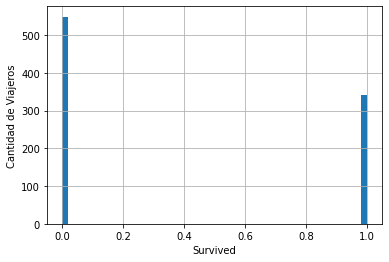

In [22]:
data['Survived'].hist(bins=50, density=False)
plt.xlabel("Survived")
plt.ylabel("Cantidad de Viajeros")
plt.show()

Por ser una variable tipo binaria no se aplicara una trasformación a la columna survived

#### 2.2 Verificar tipo de variables x

In [28]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars = cat_vars + ['Pclass'] 
#cantidad de varaibles categóricas
len(cat_vars)

6

In [29]:
cat_vars

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass']

In [30]:
#Forzamos a todas las variables como categóticas
data[cat_vars] = data[cat_vars].astype('O')
#variables numéricas
num_vars = [var for var in data.columns if(var not in cat_vars and var != 'Survived')]
len(num_vars)

4

In [31]:
num_vars

['Age', 'SibSp', 'Parch', 'Fare']

#### 2.3 Analisis de Valores Faltantes

In [32]:
var_with_na = [var for var in data.columns if(data[var].isnull().sum() > 0)]
len(var_with_na)

3

In [33]:
#proporcion de NAs en cada variable
data[var_with_na].isnull().mean().sort_values(ascending=False)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
dtype: float64

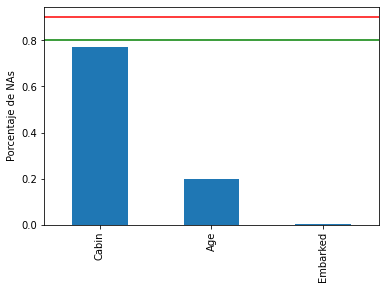

In [34]:
#graficamos porcentajes de NAs.
data[var_with_na].isnull().mean().sort_values(ascending=False).plot.bar()
plt.ylabel("Porcentaje de NAs")
plt.axhline(y=0.9, color="r")
plt.axhline(y=0.8, color="g")

In [35]:
#variables categóricas con NAs.
cat_na = [var for var in cat_vars if var in var_with_na]
cat_na

['Cabin', 'Embarked']

In [36]:
#variables numéricas con NAs.
num_na = [var for var in num_vars if var in var_with_na]
num_na

['Age']

In [37]:
print("Cantidad de variables numéricas con NAs. {}".format(len(num_na)))
print("Cantidad de variables categóticas con NAs. {}".format(len(cat_na)))

Cantidad de variables numéricas con NAs. 1
Cantidad de variables categóticas con NAs. 2


#### 2.3.1 Verificar la variable target y NA´s

In [38]:
def na_impact_over_target(df, Xvar, Yvar):
    df = data.copy()
    df[Xvar] = np.where(df[Xvar].isnull(), 1, 0)
    temp = df.groupby(Xvar)[Yvar].agg(['mean', 'std'])
    temp.plot(kind="barh", y="mean", xerr="std", legend=False, title=Yvar)
    plt.show()

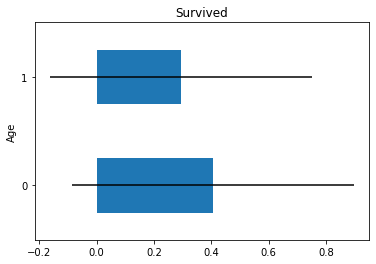

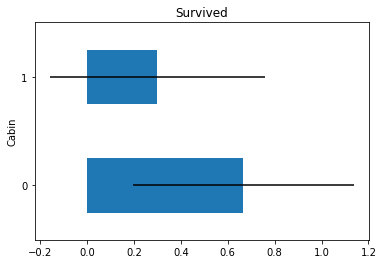

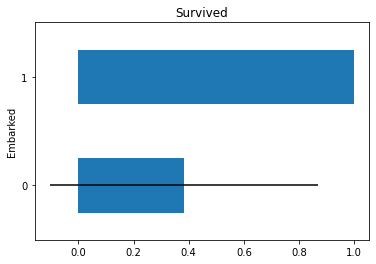

In [40]:
for var in var_with_na:
    na_impact_over_target(data, var, 'Survived')

#### 2.4 Analisis de Variables Temporales

No contamos con variables de tiempo en el dataset de titanic